### Imports

In [81]:
import pandas as pd
import numpy as np
import time
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# Suppress the specific deprecation warning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import inflect
from lda_model import simple_cleaner
from nltk.stem import WordNetLemmatizer
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.update(['non','also'])
from sklearn.feature_extraction.text import CountVectorizer
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True) 
# from bertopic import BERTopic
import scipy.stats as stats
from scipy.stats import norm
from sklearn.decomposition import TruncatedSVD
from collections import Counter
import re
from textblob import TextBlob
from sklearn.manifold import TSNE
from bokeh.plotting import figure, show
from bokeh.models import Label
from bokeh.io import output_notebook
from sklearn.decomposition import LatentDirichletAllocation


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\trevor.sauerbrey\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\trevor.sauerbrey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\trevor.sauerbrey\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Data Ingestion

In [2]:
%%time
df1a = pd.read_csv('arxiv_datasets/cs.AI_1.csv') # Artificial Intelligence 1
df1b = pd.read_csv('arxiv_datasets/cs.AI_2.csv') # Artificial Intelligence 2
df2 = pd.read_csv('arxiv_datasets/cs.CC.csv') # Computing and Computation
df3 = pd.read_csv('arxiv_datasets/cs.CE.csv') # Computational Engineering, Finance, and Science
df4 = pd.read_csv('arxiv_datasets/cs.CG.csv') # Computational Geometry
df5 = pd.read_csv('arxiv_datasets/cs.CL.csv') # Computation and Language
df6a = pd.read_csv('arxiv_datasets/cs.CV_1.csv') # Computer Vision and Pattern Recognition 1
df6b = pd.read_csv('arxiv_datasets/cs.CV_2.csv') # Computer Vision and Pattern Recognition 2
df7 = pd.read_csv('arxiv_datasets/cs.CY.csv') # Cybernetics
df8 = pd.read_csv('arxiv_datasets/cs.DB.csv') # Databases
df9 = pd.read_csv('arxiv_datasets/cs.DC.csv') # Distributed, Parallel, and Cluster Computing
df10 = pd.read_csv('arxiv_datasets/cs.DL.csv') # Machine Learning
df11 = pd.read_csv('arxiv_datasets/cs.DS.csv') # Data Structures and Algorithms
df12 = pd.read_csv('arxiv_datasets/cs.ET.csv') # Emerging Technologies
df13 = pd.read_csv('arxiv_datasets/cs.FL.csv') # Formal Languages and Automata Theory
df14 = pd.read_csv('arxiv_datasets/cs.GL.csv') # General Literature
df15 = pd.read_csv('arxiv_datasets/cs.GR.csv') # Graphics
df16 = pd.read_csv('arxiv_datasets/cs.GT.csv') # Computer Science and Game Theory
df17 = pd.read_csv('arxiv_datasets/cs.AR.csv') # Hardware Architecture
df18 = pd.read_csv('arxiv_datasets/cs.HC.csv') # Human-Computer Interaction
df19 = pd.read_csv('arxiv_datasets/cs.IR.csv') # Information Retrieval
df20 = pd.read_csv('arxiv_datasets/cs.IT.csv') # Information Theory
df21 = pd.read_csv('arxiv_datasets/cs.LO.csv') # Logic in Computer Science
df22a = pd.read_csv('arxiv_datasets/cs.LG_1.csv') # Learning 1
df22b = pd.read_csv('arxiv_datasets/cs.LG_2.csv') # Learning 2
df22c = pd.read_csv('arxiv_datasets/cs.LG_3.csv') # Learning 3
df23 = pd.read_csv('arxiv_datasets/cs.MA.csv') # Mathematical Aspects
df24 = pd.read_csv('arxiv_datasets/cs.MS.csv') # Multimedia
df25 = pd.read_csv('arxiv_datasets/cs.NI.csv') # Networking and Internet Architecture
df26 = pd.read_csv('arxiv_datasets/cs.NE.csv') # Neural and Evolutionary Computing
df27 = pd.read_csv('arxiv_datasets/cs.NA.csv') # Numerical Analysis
df28 = pd.read_csv('arxiv_datasets/cs.OS.csv') # Operating Systems
df29 = pd.read_csv('arxiv_datasets/cs.PF.csv') # Performance
df30 = pd.read_csv('arxiv_datasets/cs.PL.csv') # Programming Languages
df31 = pd.read_csv('arxiv_datasets/cs.RO.csv') # Robotics
df32 = pd.read_csv('arxiv_datasets/cs.SI.csv') # Social and Information Networks
df33 = pd.read_csv('arxiv_datasets/cs.SD.csv') # Sound
df34 = pd.read_csv('arxiv_datasets/cs.SE.csv') # Software Engineering
df35 = pd.read_csv('arxiv_datasets/cs.SC.csv') # Symbolic Computation
df36 = pd.read_csv('arxiv_datasets/cs.SY.csv') # Systems and Control
df37 = pd.read_csv('arxiv_datasets/cs.CR.csv') # Cryptography and Security
df38 = pd.read_csv('arxiv_datasets/cs.DM.csv') # Discrete Mathematics

# Concatenating multiple DataFrames into one DataFrame
# The naming convention suggests that 'df1a' and 'df1b' represent different parts of the same category, 'cs.AI'
# Similarly, 'df22a', 'df22b', and 'df22c' represent different parts of the category 'cs.LG'
# These parts are split due to file size limitations
df = pd.concat([
    df1a, df1b, df2, df3, df4, df5, df6a, df6b, df7, df8, df9, df10,
    df11, df12, df13, df14, df15, df16, df17, df18, df19, df20,
    df21, df22a, df22b, df22c, df23, df24, df25, df26, df27, df28, df29, df30,
    df31, df32, df33, df34, df35, df36, df37, df38
]).reset_index(drop=True)
df.head()

CPU times: total: 17.9 s
Wall time: 18.6 s


,Title,ID,Published,Updated,Summary,Author,Comments,Journal_Ref,Link,Primary_Category,Categories,DOI,License,Affiliation,Unnamed: 0
0,Domain-Independent Dynamic Programming,http://arxiv.org/abs/2401.13883v1,2024-01-25T01:48:09Z,2024-01-25T01:48:09Z,"For combinatorial optimization problems, mod...","['\nRyo Kuroiwa\n', '\nJ. Christopher Beck\n']",Manuscript submitted to JACM,NaN,http://arxiv.org/abs/2401.13883v1,cs.AI,['cs.AI'],NaN,NaN,[],NaN
1,Agent-based Simulation with Netlogo to Evaluat...,http://arxiv.org/abs/2401.14153v1,2024-01-25T13:05:06Z,2024-01-25T13:05:06Z,In this paper an agent-based simulation is d...,"['\nJ. Carbo\n', '\nN. Sanchez\n', '\nJ. M. Mo...",NaN,NaN,http://dx.doi.org/10.1057/jos.2016.10,cs.AI,['cs.AI'],10.1057/jos.2016.10,NaN,[],NaN
2,Automated legal reasoning with discretion to a...,http://arxiv.org/abs/2401.14511v1,2024-01-25T21:11:08Z,2024-01-25T21:11:08Z,Automated legal reasoning and its applicatio...,"['\nJoaquín Arias\n', '\nMar Moreno-Rebato\n',...",NaN,Artificial Intelligence and Law (2023),http://dx.doi.org/10.1007/s10506-023-09376-5,cs.AI,"['cs.AI', 'I.2.1']",10.1007/s10506-023-09376-5,NaN,[],NaN
3,Efficient Constraint Generation for Stochastic...,http://arxiv.org/abs/2401.14636v1,2024-01-26T04:00:07Z,2024-01-26T04:00:07Z,Current methods for solving Stochastic Short...,"['\nJohannes Schmalz\n', '\nFelipe Trevizan\n']",Extended version of AAAI 2024 paper,NaN,http://arxiv.org/abs/2401.14636v1,cs.AI,['cs.AI'],NaN,NaN,[],NaN
4,Synthetic Multimodal Dataset for Empowering Sa...,http://arxiv.org/abs/2401.14743v1,2024-01-26T10:05:41Z,2024-01-26T10:05:41Z,This paper presents a synthetic multimodal d...,"['\nTakanori Ugai\n', '\nShusaku Egami\n', '\n...","7 pages, 2 figures,4 tables",NaN,http://arxiv.org/abs/2401.14743v1,cs.AI,['cs.AI'],NaN,NaN,[],NaN


In [4]:
sample_df = df.sample(n=1000, random_state=42)  
sample_df

,Title,ID,Published,Updated,Summary,Author,Comments,Journal_Ref,Link,Primary_Category,Categories,DOI,License,Affiliation,Unnamed: 0
145319,Improving CLIP Training with Language Rewrites,http://arxiv.org/abs/2305.20088v2,2023-05-31T17:59:04Z,2023-10-28T08:46:13Z,Contrastive Language-Image Pre-training (CLI...,"['\nLijie Fan\n', '\nDilip Krishnan\n', '\nPhi...",NeurIPS 2023,NaN,http://arxiv.org/abs/2305.20088v2,cs.CV,"['cs.CV', 'cs.CL', 'cs.LG']",NaN,NaN,[],NaN
523953,Some challenges of calibrating differentiable ...,http://arxiv.org/abs/2307.01085v1,2023-07-03T15:07:10Z,2023-07-03T15:07:10Z,Agent-based models (ABMs) are a promising ap...,"['\nArnau Quera-Bofarull\n', '\nJoel Dyer\n', ...",Accepted at the ICML 2023 Differentiable Almos...,NaN,http://arxiv.org/abs/2307.01085v1,cs.MA,"['cs.MA', 'cs.AI', 'q-fin.TR', 'stat.ML']",NaN,NaN,[],NaN
10378,Building Safe and Reliable AI systems for Safe...,http://arxiv.org/abs/2308.03176v1,2023-08-06T18:05:59Z,2023-08-06T18:05:59Z,Although AI systems have been applied in var...,['\nShuang Ao\n'],4 pages,2023,http://arxiv.org/abs/2308.03176v1,cs.AI,['cs.AI'],NaN,NaN,[],NaN
370564,Set-Theoretic and Type-Theoretic Ordinals Coin...,http://arxiv.org/abs/2301.10696v3,2023-01-25T16:59:23Z,2023-06-12T21:12:33Z,"In constructive set theory, an ordinal is a ...","['\nTom de Jong\n', '\nNicolai Kraus\n', '\nFr...",v2: Minor changes. To appear at LICS'23. v3: A...,38th Annual ACM/IEEE Symposium on Logic in Com...,http://dx.doi.org/10.1109/LICS56636.2023.10175762,cs.LO,"['cs.LO', 'math.LO']",10.1109/LICS56636.2023.10175762,NaN,[],NaN
256472,The Energy Complexity of BFS in Radio Networks,http://arxiv.org/abs/2007.09816v1,2020-07-19T23:26:59Z,2020-07-19T23:26:59Z,We consider a model of energy complexity in ...,"['\nYi-Jun Chang\n', '\nVarsha Dani\n', '\nTho...",To appear in PODC 2020,NaN,http://arxiv.org/abs/2007.09816v1,cs.DS,"['cs.DS', 'cs.DC']",NaN,NaN,[],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481934,DALC: Distributed Automatic LSTM Customization...,http://arxiv.org/abs/2001.09821v2,2020-01-24T09:25:36Z,2020-02-04T12:44:23Z,"Over the past decade, several approaches hav...","['\nMing-Chang Lee\n', '\nJia-Chun Lin\n']","12 pages, 5 figures, the 34th International Co...",NaN,http://arxiv.org/abs/2001.09821v2,cs.LG,"['cs.LG', 'eess.SP', 'stat.ML']",NaN,NaN,[],1431.0
594540,Learning Control Admissibility Models with Gra...,http://arxiv.org/abs/2210.09378v1,2022-10-17T19:20:58Z,2022-10-17T19:20:58Z,Deep reinforcement learning in continuous do...,"['\nChenning Yu\n', '\nHongzhan Yu\n', '\nSicu...",NaN,NaN,http://arxiv.org/abs/2210.09378v1,cs.RO,"['cs.RO', 'cs.AI', 'cs.MA', 'cs.SY', 'eess.SY']",NaN,NaN,[],NaN
101807,Climate and Weather: Inspecting Depression Det...,http://arxiv.org/abs/2204.14099v2,2022-04-29T13:44:22Z,2022-05-05T19:45:37Z,Automatic depression detection has attracted...,"['\nWen Wu\n', '\nMengyue Wu\n', '\nKai Yu\n']",NaN,ICASSP 2022-2022 IEEE International Conference...,http://dx.doi.org/10.1109/ICASSP43922.2022.974...,cs.CL,['cs.CL'],10.1109/ICASSP43922.2022.9746634,NaN,[],NaN
12361,A Positive-Unlabeled Metric Learning Framework...,http://arxiv.org/abs/2306.14806v2,2023-06-26T16:05:59Z,2024-01-25T10:26:14Z,The goal of document-level relation extracti...,"['\nYe Wang\n', '\nHuazheng Pan\n', '\nTao Zha...",Accepted by AAAI 2024,NaN,http://arxiv.org/abs/2306.14806v2,cs.CL,"['cs.CL', 'cs.AI']",NaN,NaN,[],NaN


In [5]:
df = sample_df

In [7]:
reindexed_data = df['Summary']
reindexed_data.index = df['Published']
dates = reindexed_data.index = df['Published']
df.head()

,Title,ID,Published,Updated,Summary,Author,Comments,Journal_Ref,Link,Primary_Category,Categories,DOI,License,Affiliation,Unnamed: 0
145319,Improving CLIP Training with Language Rewrites,http://arxiv.org/abs/2305.20088v2,2023-05-31T17:59:04Z,2023-10-28T08:46:13Z,Contrastive Language-Image Pre-training (CLI...,"['\nLijie Fan\n', '\nDilip Krishnan\n', '\nPhi...",NeurIPS 2023,NaN,http://arxiv.org/abs/2305.20088v2,cs.CV,"['cs.CV', 'cs.CL', 'cs.LG']",NaN,NaN,[],NaN
523953,Some challenges of calibrating differentiable ...,http://arxiv.org/abs/2307.01085v1,2023-07-03T15:07:10Z,2023-07-03T15:07:10Z,Agent-based models (ABMs) are a promising ap...,"['\nArnau Quera-Bofarull\n', '\nJoel Dyer\n', ...",Accepted at the ICML 2023 Differentiable Almos...,NaN,http://arxiv.org/abs/2307.01085v1,cs.MA,"['cs.MA', 'cs.AI', 'q-fin.TR', 'stat.ML']",NaN,NaN,[],NaN
10378,Building Safe and Reliable AI systems for Safe...,http://arxiv.org/abs/2308.03176v1,2023-08-06T18:05:59Z,2023-08-06T18:05:59Z,Although AI systems have been applied in var...,['\nShuang Ao\n'],4 pages,2023,http://arxiv.org/abs/2308.03176v1,cs.AI,['cs.AI'],NaN,NaN,[],NaN
370564,Set-Theoretic and Type-Theoretic Ordinals Coin...,http://arxiv.org/abs/2301.10696v3,2023-01-25T16:59:23Z,2023-06-12T21:12:33Z,"In constructive set theory, an ordinal is a ...","['\nTom de Jong\n', '\nNicolai Kraus\n', '\nFr...",v2: Minor changes. To appear at LICS'23. v3: A...,38th Annual ACM/IEEE Symposium on Logic in Com...,http://dx.doi.org/10.1109/LICS56636.2023.10175762,cs.LO,"['cs.LO', 'math.LO']",10.1109/LICS56636.2023.10175762,NaN,[],NaN
256472,The Energy Complexity of BFS in Radio Networks,http://arxiv.org/abs/2007.09816v1,2020-07-19T23:26:59Z,2020-07-19T23:26:59Z,We consider a model of energy complexity in ...,"['\nYi-Jun Chang\n', '\nVarsha Dani\n', '\nTho...",To appear in PODC 2020,NaN,http://arxiv.org/abs/2007.09816v1,cs.DS,"['cs.DS', 'cs.DC']",NaN,NaN,[],NaN


In [25]:
dates = df['Published']
dates.head()

145319    2023-05-31T17:59:04Z
523953    2023-07-03T15:07:10Z
10378     2023-08-06T18:05:59Z
370564    2023-01-25T16:59:23Z
256472    2020-07-19T23:26:59Z
Name: Published, dtype: object

In [9]:
# Define helper function to get the top n words
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    Returns a tuple of the top n words in a sample and their accompanying counts, given a CountVectorizer object and text sample.

    Parameters:
        n_top_words (int): Number of top words to return.
        count_vectorizer (CountVectorizer): CountVectorizer object used for vectorizing the text data.
        text_data (pandas.Series): Series containing the text data.

    Returns:
        tuple: A tuple containing two lists - the top n words and their accompanying counts.
    '''
    # Vectorize the headlines
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    # Sum up the vectors
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    # Get the indices of the top words
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    # Get the values of the top words
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    # Create word vectors
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1
    # Decode and extract words from the word vectors
    words = [word[0].encode('ascii').decode('utf-8') for word in count_vectorizer.inverse_transform(word_vectors)]
    return (words, word_values[0,:n_top_words].tolist()[0])

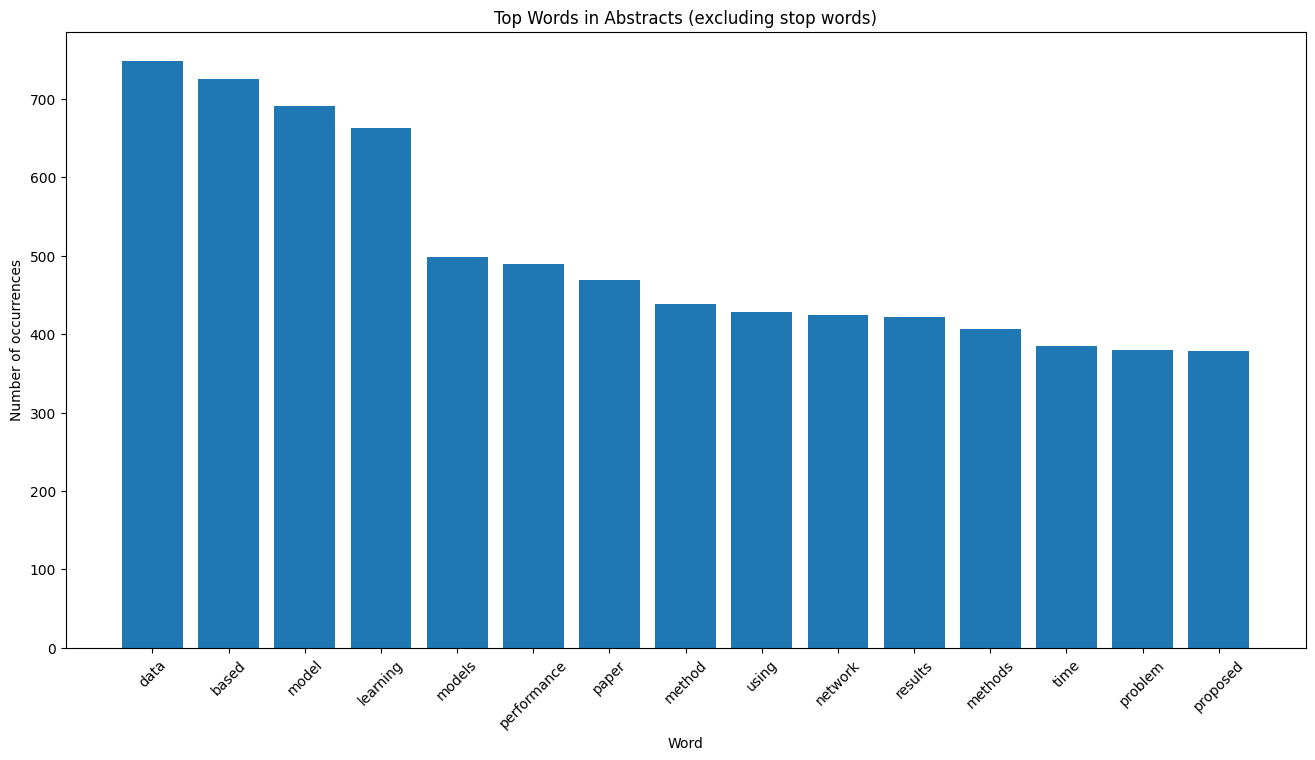

CPU times: total: 391 ms
Wall time: 403 ms


In [10]:
%%time

# Create a CountVectorizer object with English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Get the top words and their values
words, word_values = get_top_n_words(n_top_words=15, count_vectorizer=count_vectorizer, text_data=reindexed_data)

# Create a bar plot of the top words
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation=45)
ax.set_title('Top Words in Abstracts (excluding stop words)')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurrences')
plt.show()

In [13]:
%%time

# Perform part-of-speech tagging on each abstract using TextBlob
tagged_headlines = [TextBlob(reindexed_data[i]).pos_tags for i in range(reindexed_data.shape[0])]

# Create a DataFrame to store the tagged abstracts
tagged_headlines_df = pd.DataFrame({'tags': tagged_headlines})

# Initialize lists and dictionary to store word counts and part-of-speech counts
word_counts = [] 
pos_counts = {}

# Iterate over each tagged abstract to calculate word counts and part-of-speech counts
for headline in tagged_headlines_df[u'tags']:
    # Count the number of words in each abstract and add it to word_counts
    word_counts.append(len(headline))
    # Iterate over each word-tag pair in the abstract
    for tag in headline:
        # Increment the count for the corresponding part-of-speech tag
        if tag[1] in pos_counts:
            pos_counts[tag[1]] += 1
        else:
            pos_counts[tag[1]] = 1
            
# Print total number of words and mean number of words per abstract
print('Total number of words: ', np.sum(word_counts))
print('Mean number of words per headline: ', np.mean(word_counts))

Total number of words:  169105
Mean number of words per headline:  169.105
CPU times: total: 12.4 s
Wall time: 12.4 s


In [75]:
# POS tag descriptions dictionary
pos_descriptions = {
    "CC": "Coordinating conjunction",  # Connects words, phrases, or clauses with similar grammatical status
    "CD": "Cardinal number",  # Numerals that do not denote an order
    "DT": "Determiner",  # Introduces a noun and specifies its reference in the context
    "EX": "Existential there",  # Introduces existential clauses, indicating the presence of something
    "FW": "Foreign word",  # A word from another language
    "IN": "Preposition or subordinating conjunction",  # Links nouns, pronouns, or phrases to other words
    "JJ": "Adjective",  # Describes or modifies a noun
    "JJR": "Adjective, comparative",  # Compares two entities
    "JJS": "Adjective, superlative",  # Indicates the extreme degree of comparison
    "LS": "List item marker",  # Marks items in a list
    "MD": "Modal",  # Expresses necessity or possibility
    "NN": "Noun, singular or mass",  # Names a person, place, thing, or idea
    "NNS": "Noun, plural",  # Plural form of nouns
    "NNP": "Proper noun, singular",  # Names a specific individual, place, or organization
    "NNPS": "Proper noun, plural",  # Plural form of proper nouns
    "PDT": "Predeterminer",  # Precedes a determiner to modify a noun's reference
    "POS": "Possessive ending",  # Shows possession or genitive case
    "PRP": "Personal pronoun",  # Represents a specific person or thing
    "PRP$": "Possessive pronoun",  # Shows ownership
    "RB": "Adverb",  # Modifies verbs, adjectives, or other adverbs
    "RBR": "Adverb, comparative",  # Compares the action of verbs
    "RBS": "Adverb, superlative",  # Indicates the extreme degree of action
    "RP": "Particle",  # A function word that must be associated with a verb
    "SYM": "Symbol",  # Represents a symbolic value or mathematical operation
    "TO": "to",  # Precedes the infinitive form of a verb
    "UH": "Interjection",  # Expresses emotion or hesitation
    "VB": "Verb, base form",  # The basic form of a verb
    "VBD": "Verb, past tense",  # Denotes actions or states in the past
    "VBG": "Verb, gerund or present participle",  # Ends in -ing and serves as a noun or modifies a noun
    "VBN": "Verb, past participle",  # Usually ends in -ed, used to form perfect tenses
    "VBP": "Verb, non-3rd person singular present",  # Present tense not including third-person singular
    "VBZ": "Verb, 3rd person singular present",  # Present tense third-person singular form
    "WDT": "Wh-determiner",  # Introduces a clause with an interrogative word
    "WP": "Wh-pronoun",  # Pronoun introducing a clause with an interrogative word
    "WP$": "Possessive wh-pronoun",  # Possessive form of a wh-pronoun
    "WRB": "Wh-adverb"  # Adverb introducing a clause with an interrogative word
}

In [27]:
# Perform part-of-speech tagging on each abstract using TextBlob
tagged_abstracts = [TextBlob(df['Summary'][i]).pos_tags for i in range(df.shape[0])]

# Create a DataFrame to store the tagged abstracts
tagged_abstracts_df = pd.DataFrame({'Published': df['Published'], 'tags': tagged_abstracts})

# Initialize a DataFrame to store POS counts by date
pos_counts_by_date = pd.DataFrame()

# Iterate over each tagged abstract to calculate part-of-speech counts by date
for index, row in tagged_abstracts_df.iterrows():
    date = row['Published']
    tags = row['tags']
    pos_counts = {}
    # Count POS tags in the current abstract
    for tag in tags:
        if tag[1] in pos_counts:
            pos_counts[tag[1]] += 1
        else:
            pos_counts[tag[1]] = 1
    # Create a DataFrame for the current abstract's POS counts
    pos_counts_df = pd.DataFrame.from_dict(pos_counts, orient='index', columns=[date])
    # Transpose DataFrame to have dates as index
    pos_counts_df = pos_counts_df.T
    # Concatenate current POS counts with existing counts
    pos_counts_by_date = pd.concat([pos_counts_by_date, pos_counts_df], axis=0, sort=True)

# Fill NaN values with 0
pos_counts_by_date.fillna(0, inplace=True)

# Sort the DataFrame by dates
pos_counts_by_date.sort_index(inplace=True)

# Print the DataFrame
print(pos_counts_by_date)

                        CC   CD    DT   EX   FW  IN  JJ  JJR  JJS   LS  ...  \
2012-09-20T15:18:54Z   2.0  1.0  10.0  0.0  0.0  13  14  1.0  0.0  0.0  ...   
2012-11-01T17:29:50Z   4.0  0.0  20.0  0.0  0.0  23  12  0.0  0.0  0.0  ...   
2012-11-30T15:11:24Z   4.0  1.0  12.0  0.0  0.0  10  16  0.0  0.0  0.0  ...   
2013-01-30T15:02:19Z   1.0  0.0  13.0  0.0  0.0  20  10  0.0  0.0  0.0  ...   
2013-01-30T15:04:21Z   5.0  0.0   8.0  0.0  0.0  12  10  0.0  0.0  0.0  ...   
...                    ...  ...   ...  ...  ...  ..  ..  ...  ...  ...  ...   
2024-01-29T03:29:39Z   6.0  0.0  20.0  0.0  0.0  27  30  0.0  0.0  0.0  ...   
2024-01-29T09:56:35Z  18.0  1.0  22.0  0.0  0.0  28  37  0.0  0.0  0.0  ...   
2024-01-30T08:53:54Z  10.0  1.0  24.0  0.0  0.0  31  37  0.0  0.0  0.0  ...   
2024-01-30T15:45:30Z  10.0  0.0  18.0  1.0  0.0  19  22  0.0  0.0  0.0  ...   
2024-01-30T20:08:15Z   6.0  0.0  29.0  0.0  0.0  30  26  1.0  0.0  0.0  ...   

                        VB  VBD   VBG   VBN  VBP   

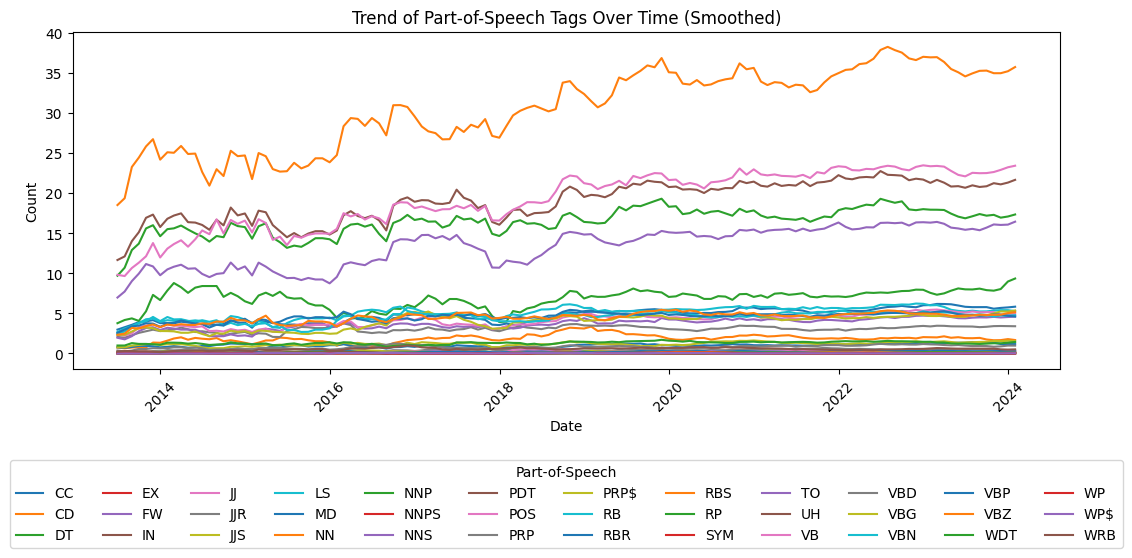

In [39]:
# Convert index to datetime
pos_counts_by_date.index = pd.to_datetime(pos_counts_by_date.index)

# Resample DataFrame by month and calculate rolling mean
monthly_pos_counts = pos_counts_by_date.resample('M').mean().fillna(0).rolling(window=10).mean()  # Adjust window size as needed

# Plot each POS tag as a separate line
plt.figure(figsize=(12, 6))

# Iterate over each column (POS tag) in monthly_pos_counts DataFrame
for column in monthly_pos_counts.columns:
    plt.plot(monthly_pos_counts.index, monthly_pos_counts[column], label=column)

# Set plot title and labels
plt.title('Trend of Part-of-Speech Tags Over Time (Smoothed)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Part-of-Speech', loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=12)

# Show plot
plt.tight_layout()
plt.show()

In [42]:
# Calculate the standard deviation for each POS tag
std_devs = pos_counts_by_date.std()

# Sort the POS tags by standard deviation in descending order
sorted_std_devs = std_devs.sort_values(ascending=False)

# Print the sorted standard deviations with descriptions
for tag, std_dev in sorted_std_devs.items():
    print(f"{pos_descriptions.get(tag, tag)}: {std_dev:.2f}")

Noun, singular or mass: 13.05
Adjective: 8.62
Preposition or subordinating conjunction: 7.94
Determiner: 7.58
Noun, plural: 7.16
Proper noun, singular: 7.16
Adverb: 3.41
Coordinating conjunction: 3.11
Verb, past participle: 3.11
Verb, base form: 2.99
Verb, gerund or present participle: 2.92
Verb, 3rd person singular present: 2.83
Verb, non-3rd person singular present: 2.69
to: 2.66
Cardinal number: 2.55
Personal pronoun: 2.09
Possessive pronoun: 1.40
Modal: 1.37
Verb, past tense: 1.35
Wh-determiner: 1.27
Wh-adverb: 0.93
Adjective, comparative: 0.86
Possessive ending: 0.70
Foreign word: 0.66
Adverb, comparative: 0.55
Adjective, superlative: 0.54
Existential there: 0.36
Adverb, superlative: 0.34
Particle: 0.32
Wh-pronoun: 0.25
Proper noun, plural: 0.22
Predeterminer: 0.21
Possessive wh-pronoun: 0.17
Symbol: 0.11
Interjection: 0.10
List item marker: 0.03


In [57]:
# Initialize a Linear Regression model
model = LinearRegression()

# Prepare the time index for regression analysis
# Convert the date index to a numerical value (e.g., number of days since start)
time_index = np.array((pos_counts_by_date.index - pos_counts_by_date.index[0]).days).reshape(-1, 1)

# Dictionary to hold the POS tags and their corresponding slopes
slopes = {}

# Define descriptions for POS tags
pos_descriptions = {
    'NN': 'Noun',
    'VB': 'Verb',
    'JJ': 'Adjective',
    # Add more descriptions as needed
}

# Fit a model for each POS tag and store the slope (coefficient)
for column in pos_counts_by_date.columns:
    y = pos_counts_by_date[column].values
    model.fit(time_index, y)
    slopes[column] = model.coef_[0]

# Sort the slopes to identify the POS tags with the greatest rate of change
sorted_slopes = sorted(slopes.items(), key=lambda item: abs(item[1]), reverse=True)

# Print the sorted slopes with descriptions
for pos_tag, slope in sorted_slopes:
    description = pos_descriptions.get(pos_tag, pos_tag)  # Get description or use POS tag if not found
    print(f"{description}: {slope:.9f}")

Noun: 0.002109947
Adjective: 0.001855164
NNS: 0.001235120
IN: 0.000958424
NNP: 0.000505547
VBG: 0.000434379
CC: 0.000390498
Verb: 0.000363785
TO: 0.000348584
RB: 0.000263697
DT: 0.000231303
VBZ: 0.000215603
VBD: 0.000096133
VBN: 0.000092757
PRP$: 0.000085825
PRP: 0.000079236
MD: 0.000065439
VBP: 0.000056909
RBR: 0.000042803
JJS: -0.000029992
WRB: -0.000026246
CD: 0.000022433
POS: 0.000021061
WP: -0.000014054
FW: 0.000013260
EX: 0.000011269
SYM: -0.000011201
NNPS: -0.000008332
JJR: -0.000007504
RBS: 0.000003550
WDT: 0.000001851
UH: -0.000001837
PDT: -0.000001238
WP$: -0.000000660
LS: 0.000000657
RP: 0.000000403


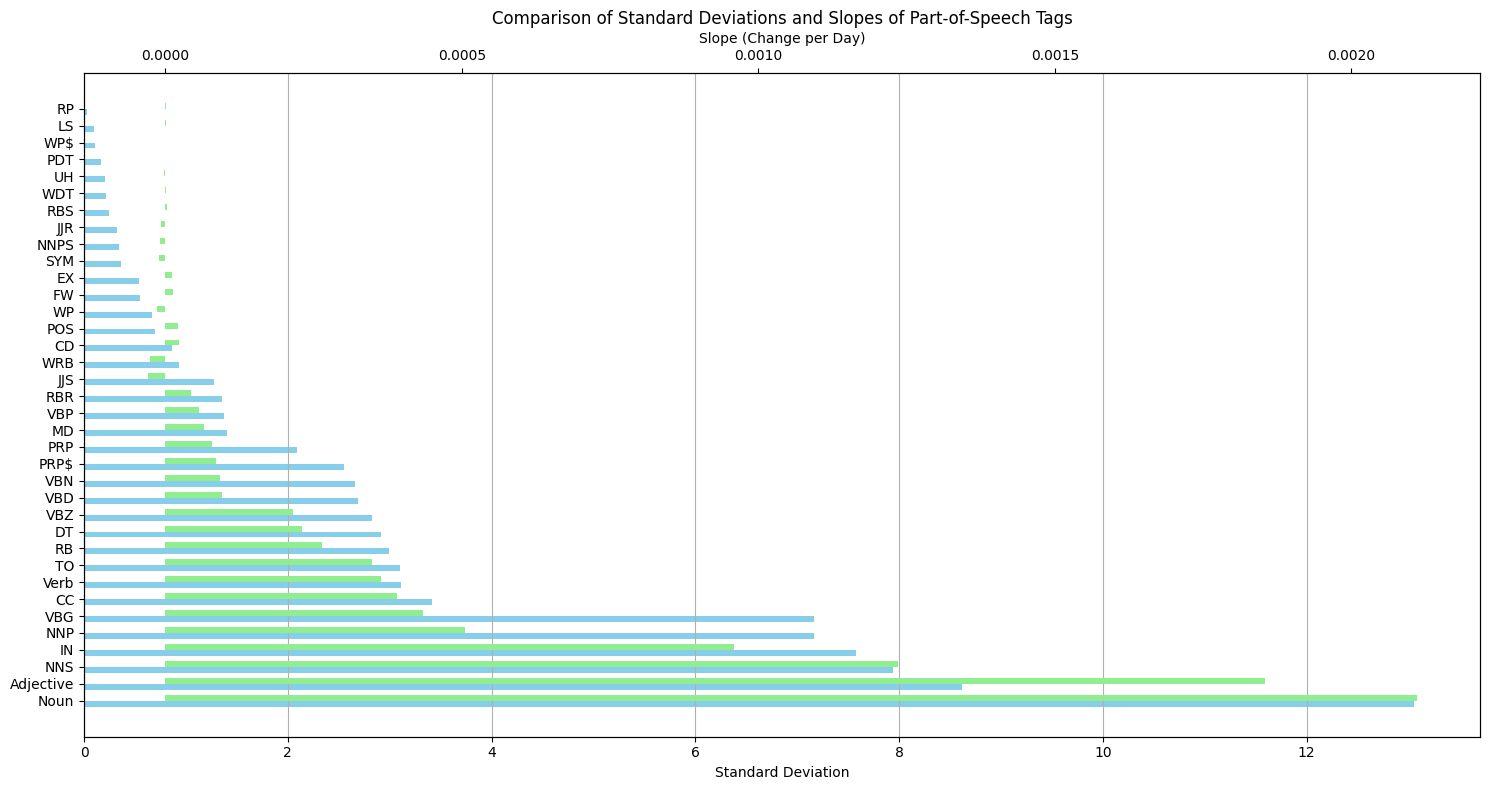

In [58]:
# Extract POS tags and their standard deviations
std_devs = pos_counts_by_date.std()
sorted_std_devs = std_devs.sort_values(ascending=False)
std_dev_values = [std_devs[tag] for tag in sorted_std_devs.index]

# Extract POS tags and slopes
slopes_values = [slope[1] for slope in sorted_slopes]
pos_tags = [slope[0] for slope in sorted_slopes]

# Generate positions for the bars
x = np.arange(len(pos_tags))

# Width of the bars
width = 0.35

# Create the figure and axis objects
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot bars for standard deviations on primary y-axis
ax1.barh(x - width/2, std_dev_values, width, label='Standard Deviation', color='skyblue')

# Set y-axis labels as POS tags
ax1.set_yticks(x)
ax1.set_yticklabels([pos_descriptions.get(tag, tag) for tag in pos_tags])

# Set labels and title
ax1.set_xlabel('Standard Deviation')
ax1.set_title('Comparison of Standard Deviations and Slopes of Part-of-Speech Tags')

# Create a secondary y-axis for slopes
ax2 = ax1.twiny()

# Plot bars for slopes on secondary y-axis
ax2.barh(x + width/2, slopes_values, width, label='Slope (Change per Day)', color='lightgreen')

# Set labels for secondary y-axis
ax2.set_xlabel('Slope (Change per Day)')

# Display gridlines for better readability
ax1.grid(axis='x')

# Show plot
plt.tight_layout()
plt.show()

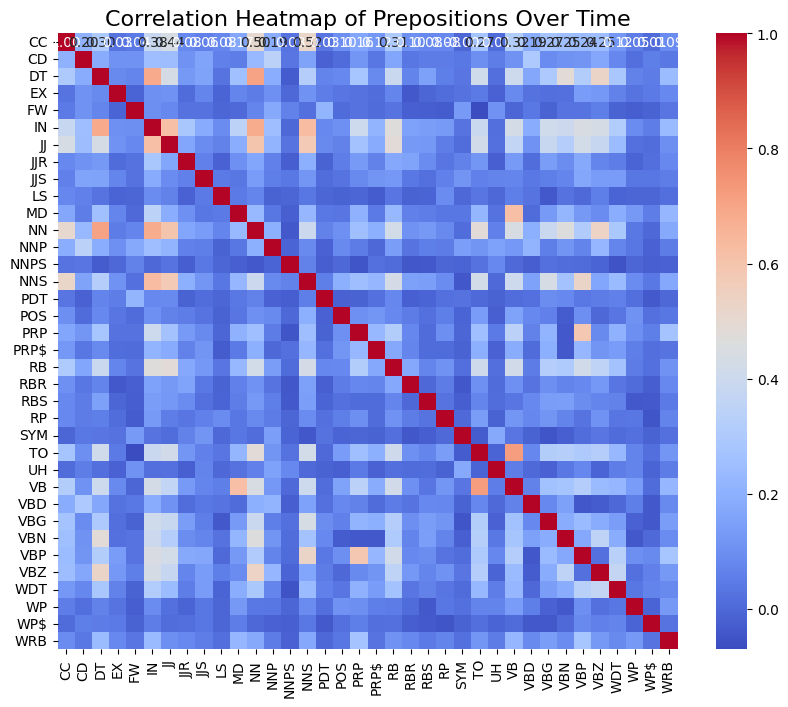

In [71]:
# Calculate correlation matrix
correlation_matrix = pos_counts_by_date.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Prepositions Over Time', fontsize=16)
plt.show()

In [77]:
# Get the upper triangle of the correlation matrix (excluding the diagonal)
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find the pairs with the highest correlations
highest_correlations = upper_triangle.stack().nlargest(10)

# Print the pairs with their correlation coefficients and descriptions
for (preposition1, preposition2), correlation in highest_correlations.items():
    preposition1_description = pos_descriptions.get(preposition1, preposition1)
    preposition2_description = pos_descriptions.get(preposition2, preposition2)
    print(f"{preposition1} ({preposition1_description}) and {preposition2} ({preposition2_description}): {correlation:.4f}")

TO (to) and VB (Verb, base form): 0.7234
DT (Determiner) and NN (Noun, singular or mass): 0.7035
DT (Determiner) and IN (Preposition or subordinating conjunction): 0.6863
IN (Preposition or subordinating conjunction) and NN (Noun, singular or mass): 0.6810
IN (Preposition or subordinating conjunction) and NNS (Noun, plural): 0.6307
IN (Preposition or subordinating conjunction) and JJ (Adjective): 0.6188
MD (Modal) and VB (Verb, base form): 0.6178
JJ (Adjective) and NN (Noun, singular or mass): 0.5984
PRP (Personal pronoun) and VBP (Verb, non-3rd person singular present): 0.5891
JJ (Adjective) and NNS (Noun, plural): 0.5759


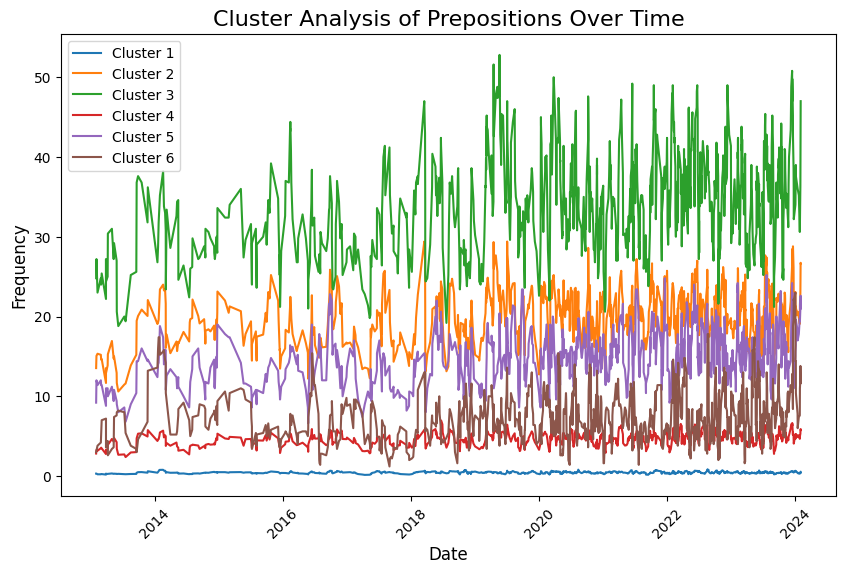

In [99]:
from sklearn.cluster import KMeans

# Perform cluster analysis
kmeans = KMeans(n_clusters=6, random_state=0).fit(pos_counts_by_date.T)
labels = kmeans.labels_

# Plot cluster analysis
plt.figure(figsize=(10, 6))
dates = pos_counts_by_date.index
for i in range(max(labels) + 1):
    cluster_mean = pos_counts_by_date.T[labels == i].mean(axis=0)
    # Apply rolling average with window size 5
    smoothed_cluster_mean = cluster_mean.rolling(window=5).mean()  # You can adjust the window size as needed
    plt.plot(dates, smoothed_cluster_mean, label=f'Cluster {i + 1}')

plt.title('Cluster Analysis of Prepositions Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.show()

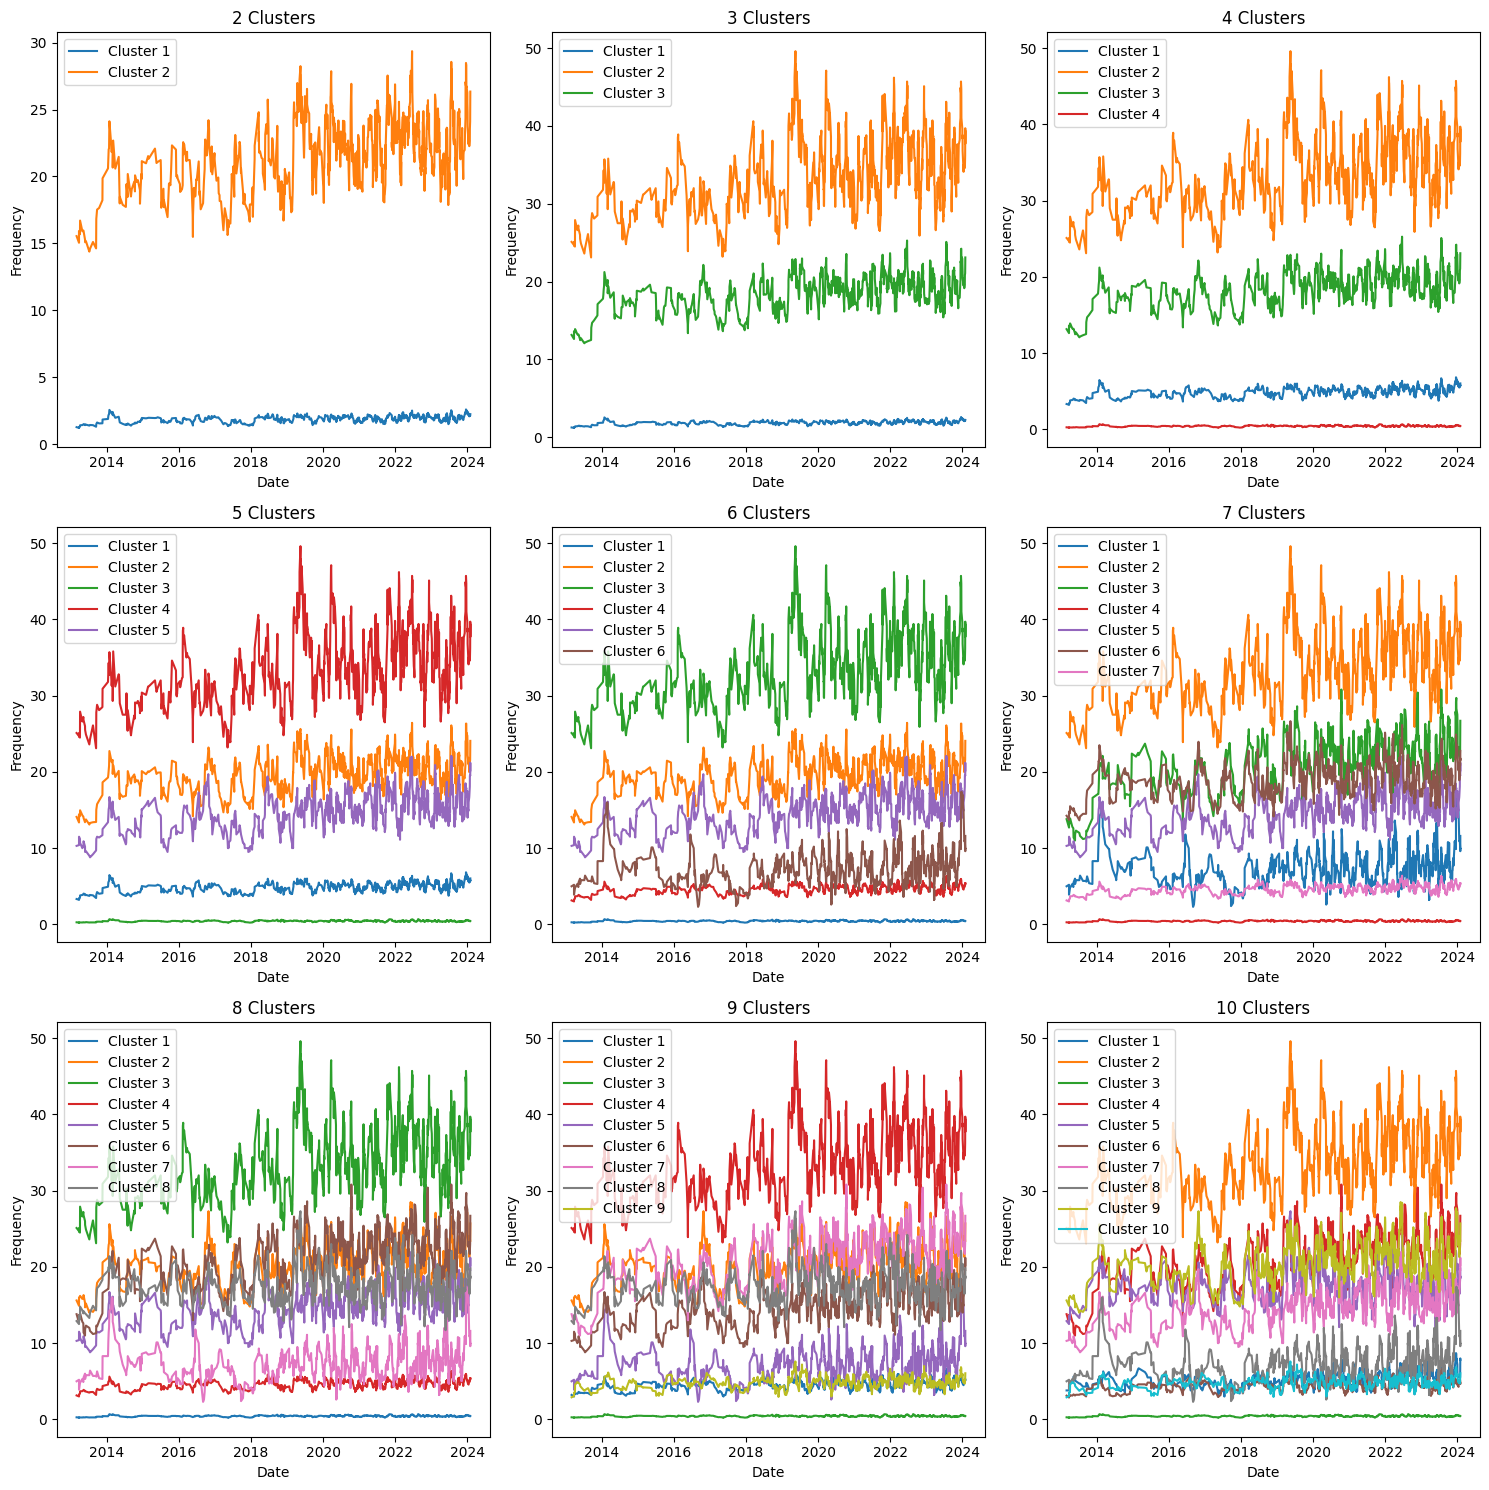

In [107]:
# Define the number of clusters for the grid
n_rows = 3
n_cols = 3
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 15))

# Iterate through different numbers of clusters
for n_clusters in range(2, 11):
    # Perform cluster analysis
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(pos_counts_by_date.T)
    labels = kmeans.labels_

    # Plot cluster analysis
    row = (n_clusters - 2) // n_cols
    col = (n_clusters - 2) % n_cols
    dates = pos_counts_by_date.index
    for i in range(max(labels) + 1):
        cluster_mean = pos_counts_by_date.T[labels == i].mean(axis=0)
        # Apply rolling average with window size 5
        smoothed_cluster_mean = cluster_mean.rolling(window=10).mean()  # You can adjust the window size as needed
        axs[row, col].plot(dates, smoothed_cluster_mean, label=f'Cluster {i + 1}')

    axs[row, col].set_title(f'{n_clusters} Clusters')
    axs[row, col].set_xlabel('Date', fontsize=10)
    axs[row, col].set_ylabel('Frequency', fontsize=10)
    axs[row, col].legend()

# Adjust layout
plt.tight_layout()
plt.show()

In [108]:
# Create an empty dictionary to store prepositions for each cluster
prepositions_by_cluster = {f'Cluster {i+1}': [] for i in range(max(labels) + 1)}

# Iterate over the labels and add prepositions to the corresponding cluster
for label, preposition in zip(labels, pos_counts_by_date.columns):
    prepositions_by_cluster[f'Cluster {label + 1}'].append(preposition)

# Print prepositions for each cluster with descriptions
for cluster, prepositions in prepositions_by_cluster.items():
    print(f"{cluster}:")
    for preposition in prepositions:
        print(f"  {preposition} - {pos_descriptions.get(preposition, 'Unknown')}")

Cluster 1:
  CC - Coordinating conjunction
Cluster 2:
  NN - Noun, singular or mass
Cluster 3:
  CD - Cardinal number
  EX - Existential there
  FW - Foreign word
  JJR - Adjective, comparative
  JJS - Adjective, superlative
  LS - List item marker
  MD - Modal
  NNPS - Proper noun, plural
  PDT - Predeterminer
  POS - Possessive ending
  PRP$ - Possessive pronoun
  RBR - Adverb, comparative
  RBS - Adverb, superlative
  RP - Particle
  SYM - Symbol
  UH - Interjection
  VBD - Verb, past tense
  WDT - Wh-determiner
  WP - Wh-pronoun
  WP$ - Possessive wh-pronoun
  WRB - Wh-adverb
Cluster 4:
  JJ - Adjective
Cluster 5:
  DT - Determiner
Cluster 6:
  PRP - Personal pronoun
  RB - Adverb
  TO - to
  VB - Verb, base form
  VBG - Verb, gerund or present participle
  VBP - Verb, non-3rd person singular present
Cluster 7:
  NNS - Noun, plural
Cluster 8:
  NNP - Proper noun, singular
Cluster 9:
  IN - Preposition or subordinating conjunction
Cluster 10:
  VBN - Verb, past participle
  VBZ - Ve

Cluster 1:
  CC - Coordinating conjunction
  CD - Cardinal number
  EX - Existential there
  FW - Foreign word
  JJR - Adjective, comparative
  JJS - Adjective, superlative
  LS - List item marker
  MD - Modal
  NNP - Proper noun, singular
  NNPS - Proper noun, plural
  PDT - Predeterminer
  POS - Possessive ending
  PRP - Personal pronoun
  PRP$ - Possessive pronoun
  RB - Adverb
  RBR - Adverb, comparative
  RBS - Adverb, superlative
  RP - Particle
  SYM - Symbol
  TO - to
  UH - Interjection
  VB - Verb, base form
  VBD - Verb, past tense
  VBG - Verb, gerund or present participle
  VBN - Verb, past participle
  VBP - Verb, non-3rd person singular present
  VBZ - Verb, 3rd person singular present
  WDT - Wh-determiner
  WP - Wh-pronoun
  WP$ - Possessive wh-pronoun
  WRB - Wh-adverb
Cluster 2:
  DT - Determiner
  IN - Preposition or subordinating conjunction
  JJ - Adjective
  NN - Noun, singular or mass
  NNS - Noun, plural
Cluster 1:
  CC - Coordinating conjunction
  CD - Cardina

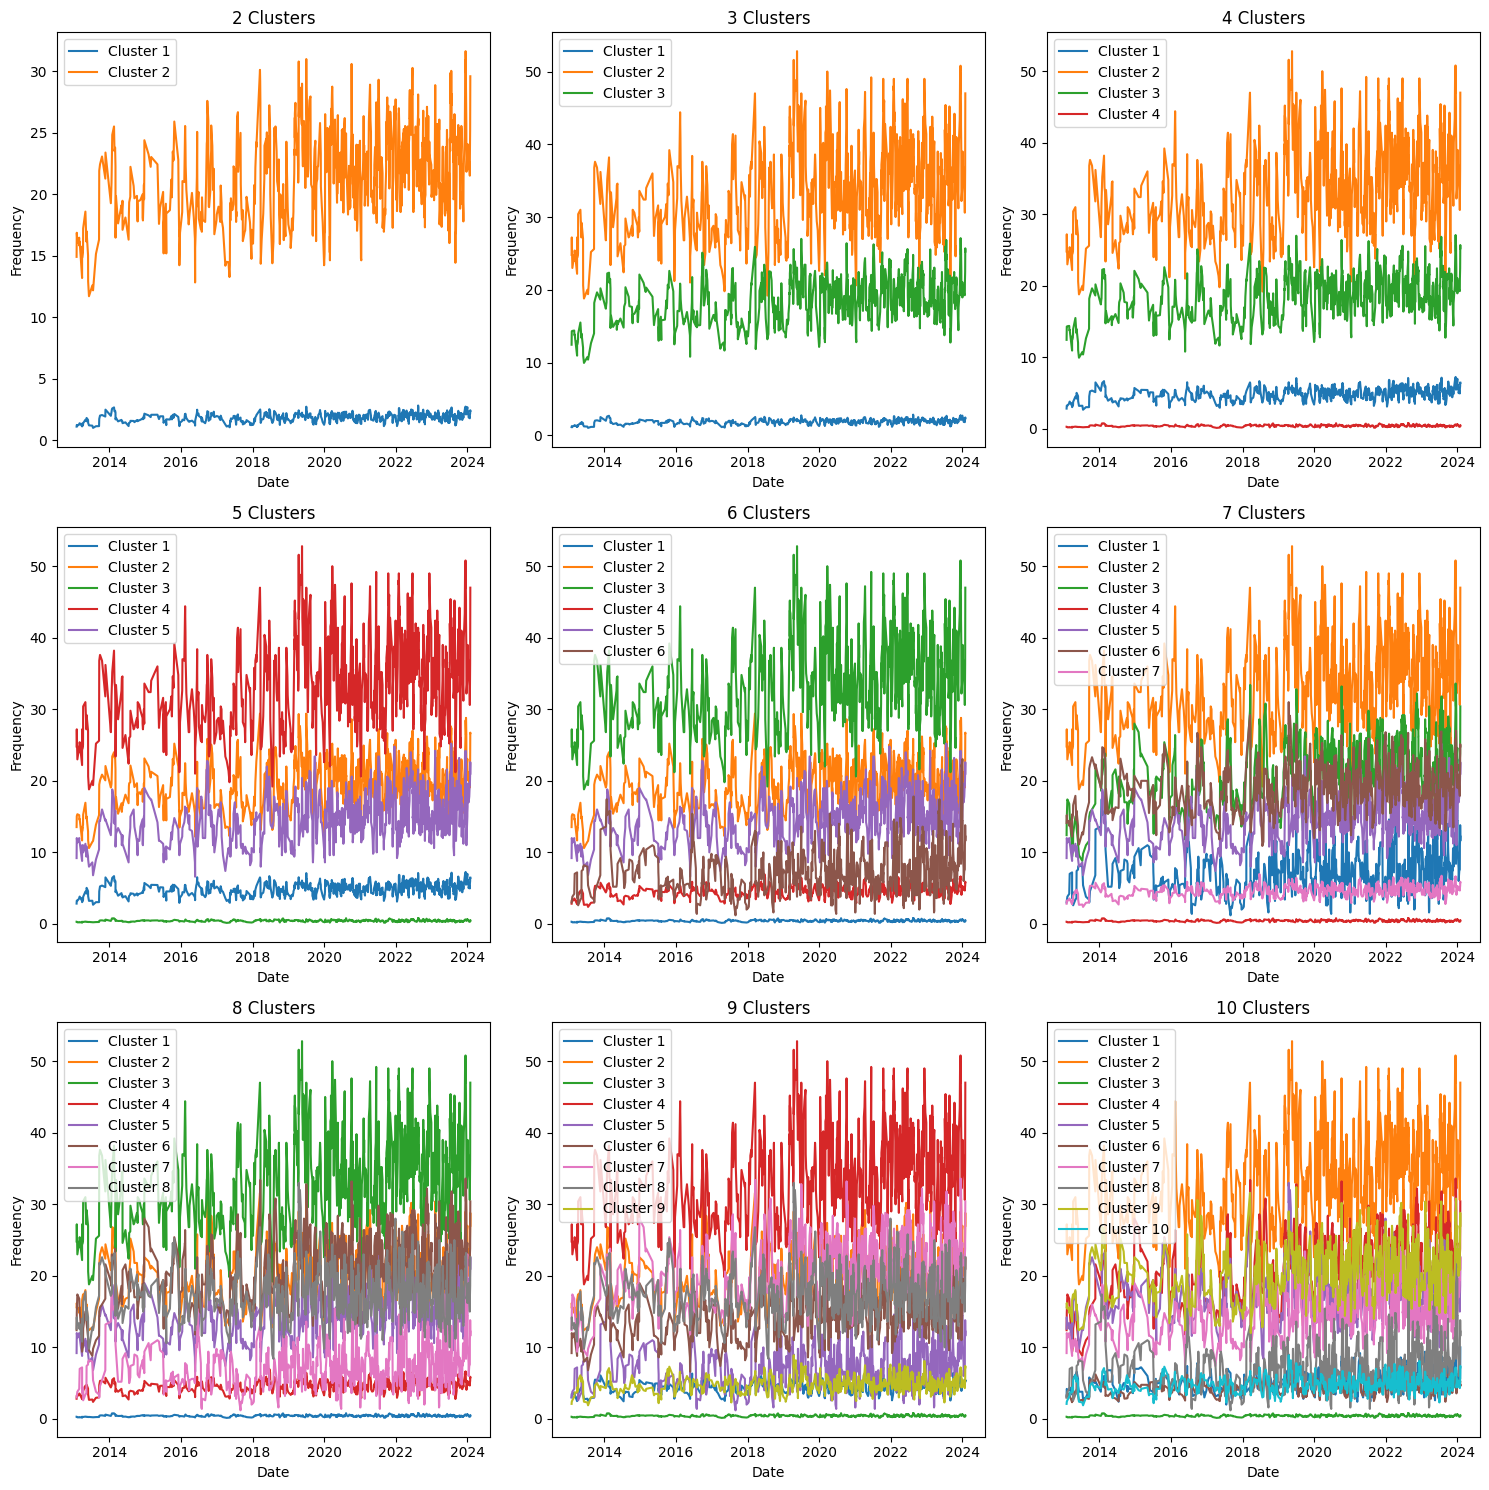

In [109]:
# Define the number of clusters for the grid
n_rows = 3
n_cols = 3
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 15))

# Iterate through different numbers of clusters
for n_clusters in range(2, 11):
    # Perform cluster analysis
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(pos_counts_by_date.T)
    labels = kmeans.labels_

    # Create an empty dictionary to store prepositions for each cluster
    prepositions_by_cluster = {f'Cluster {i+1}': [] for i in range(max(labels) + 1)}

    # Iterate over the labels and add prepositions to the corresponding cluster
    for label, preposition in zip(labels, pos_counts_by_date.columns):
        prepositions_by_cluster[f'Cluster {label + 1}'].append(preposition)

    # Plot cluster analysis
    row = (n_clusters - 2) // n_cols
    col = (n_clusters - 2) % n_cols
    dates = pos_counts_by_date.index
    for i in range(max(labels) + 1):
        cluster_mean = pos_counts_by_date.T[labels == i].mean(axis=0)
        # Apply rolling average with window size 5
        smoothed_cluster_mean = cluster_mean.rolling(window=5).mean()  # You can adjust the window size as needed
        axs[row, col].plot(dates, smoothed_cluster_mean, label=f'Cluster {i + 1}')

    axs[row, col].set_title(f'{n_clusters} Clusters')
    axs[row, col].set_xlabel('Date', fontsize=10)
    axs[row, col].set_ylabel('Frequency', fontsize=10)
    axs[row, col].legend()

    # Print prepositions for each cluster with descriptions
    for cluster, prepositions in prepositions_by_cluster.items():
        print(f"{cluster}:")
        for preposition in prepositions:
            print(f"  {preposition} - {pos_descriptions.get(preposition, 'Unknown')}")

# Adjust layout
plt.tight_layout()
plt.show()

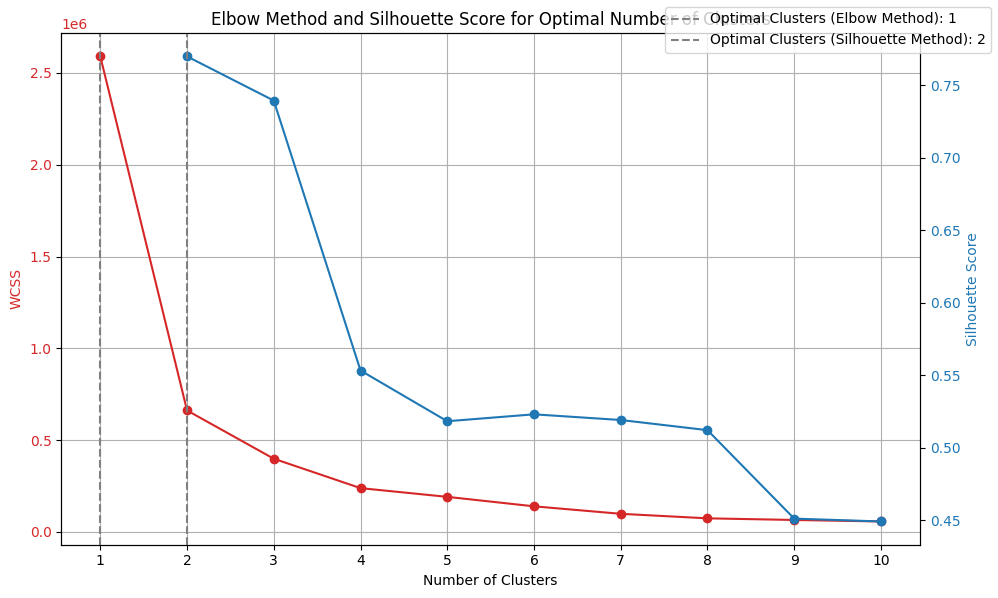

In [105]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Calculate WCSS for different values of k
wcss = []
silhouette_scores = []
max_clusters = 10  # Maximum number of clusters to try

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(pos_counts_by_date.T)
    wcss.append(kmeans.inertia_)
    if i > 1:
        silhouette_scores.append(silhouette_score(pos_counts_by_date.T, kmeans.labels_))

# Find the optimal number of clusters using the elbow method
optimal_clusters_elbow = np.argmin(np.gradient(wcss)) + 1

# Find the optimal number of clusters using the silhouette score method
optimal_clusters_silhouette = np.argmax(silhouette_scores) + 2  # Silhouette score is calculated starting from 2 clusters

# Plot both graphs together
fig, ax1 = plt.subplots(figsize=(10, 6))

# Elbow method plot
color = 'tab:red'
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('WCSS', color=color)
ax1.plot(range(1, max_clusters + 1), wcss, marker='o', color=color)
ax1.axvline(optimal_clusters_elbow, color='gray', linestyle='--', label=f'Optimal Clusters (Elbow Method): {optimal_clusters_elbow}')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

# Silhouette score plot
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Silhouette Score', color=color)  
ax2.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', color=color)
ax2.axvline(optimal_clusters_silhouette, color='gray', linestyle='--', label=f'Optimal Clusters (Silhouette Method): {optimal_clusters_silhouette}')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('Elbow Method and Silhouette Score for Optimal Number of Clusters')
plt.xticks(range(1, max_clusters + 1))
fig.legend(loc='upper right')
plt.show()

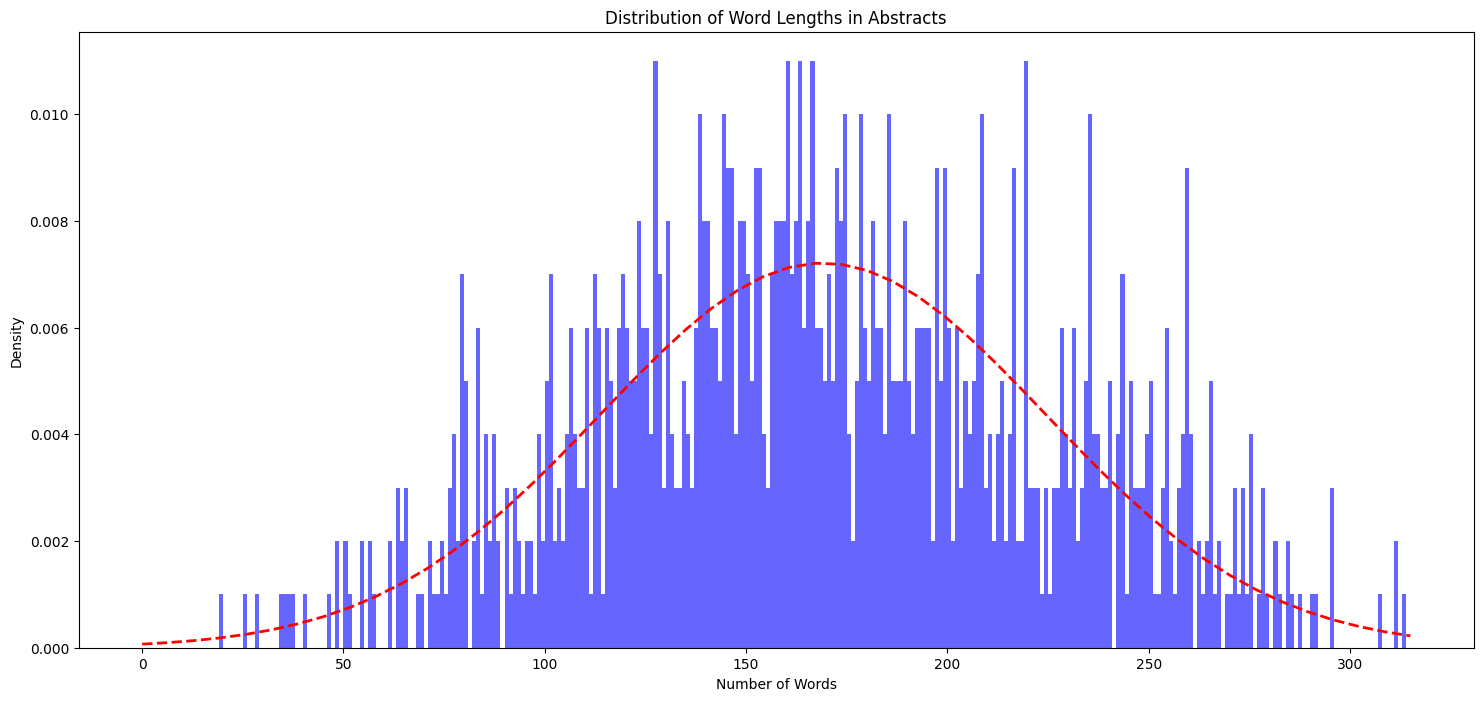

CPU times: total: 625 ms
Wall time: 609 ms


In [15]:
%%time

# Find the maximum word count and add 1 for the upper range
max_word_count = max(word_counts) + 1  

# Generate evenly spaced numbers over the interval from 0 to max_word_count, for plotting the PDF
x_values = np.linspace(0, max_word_count, 50)

# Calculate the Probability Density Function (PDF) for the normal distribution fit to the data
y = norm.pdf(x_values, np.mean(word_counts), np.std(word_counts))

# Create the plot
fig, ax = plt.subplots(figsize=(18, 8))

# Plot the histogram of word counts
ax.hist(word_counts, bins=range(1, max_word_count), density=True, alpha=0.6, color='b')

# Overlay the PDF
ax.plot(x_values, y, 'r--', linewidth=2)

# Set the title and labels
ax.set_title('Distribution of Word Lengths in Abstracts')
ax.set_xlabel('Number of Words')
ax.set_ylabel('Density')

plt.show()

In [17]:
%%time


total_count = sum(pos_counts.values())

# Calculate proportions and convert to percentages
pos_percentages = {tag: (count / total_count) * 100 for tag, count in pos_counts.items()}

# Sort POS types and percentages
pos_sorted_types = sorted(pos_percentages, key=pos_percentages.__getitem__, reverse=True)
pos_sorted_percentages = [pos_percentages[tag] for tag in pos_sorted_types]

# Map short POS tags to their descriptions for the x-tick labels
pos_sorted_descriptions = [pos_descriptions.get(tag, "Unknown") for tag in pos_sorted_types]
pos_sorted_descriptions

# Printing each POS tag with its corresponding percentage
for tag, percentage in zip(pos_sorted_types, pos_sorted_percentages):
    print(f'{tag}: {percentage:.2f}%')
    
# Plotting
fig, ax = plt.subplots(figsize=(18, 8))
bars = ax.bar(range(len(pos_percentages)), pos_sorted_percentages)

ax.set_xticks(range(len(pos_percentages)))
ax.set_xticklabels(pos_sorted_descriptions, rotation=45, ha="right")  # Rotation for x-axis tick labels
ax.set_title('Part-of-Speech Tagging Percentage in Abstract Corpus')
ax.set_xlabel('Part-of-Speech Tag')
ax.set_ylabel('Percentage')

# Adding percentage labels on top of each bar with rotation
for bar in bars:
    height = bar.get_height()
    label_x_pos = bar.get_x() + bar.get_width() / 2
    ax.annotate(f'{height:.2f}%', xy=(label_x_pos, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', rotation=45)  # Rotation for bar labels

plt.tight_layout()
plt.show()

CPU times: total: 0 ns
Wall time: 0 ns


['Noun, singular or mass',
 'Adjective',
 'Preposition or subordinating conjunction',
 'Determiner',
 'Noun, plural',
 'Proper noun, singular',
 'Adverb',
 'Coordinating conjunction',
 'Verb, non-3rd person singular present',
 'Verb, 3rd person singular present',
 'Verb, past participle',
 'Verb, base form',
 'Verb, gerund or present participle',
 'to',
 'Personal pronoun',
 'Cardinal number',
 'Wh-determiner',
 'Possessive pronoun',
 'Modal',
 'Verb, past tense',
 'Wh-adverb',
 'Adjective, comparative',
 'Possessive ending',
 'Adverb, comparative',
 'Adjective, superlative',
 'Foreign word',
 'Existential there',
 'Adverb, superlative',
 'Particle',
 'Wh-pronoun',
 'Predeterminer',
 'Possessive wh-pronoun',
 'Proper noun, plural',
 'Symbol',
 'Interjection',
 'List item marker']

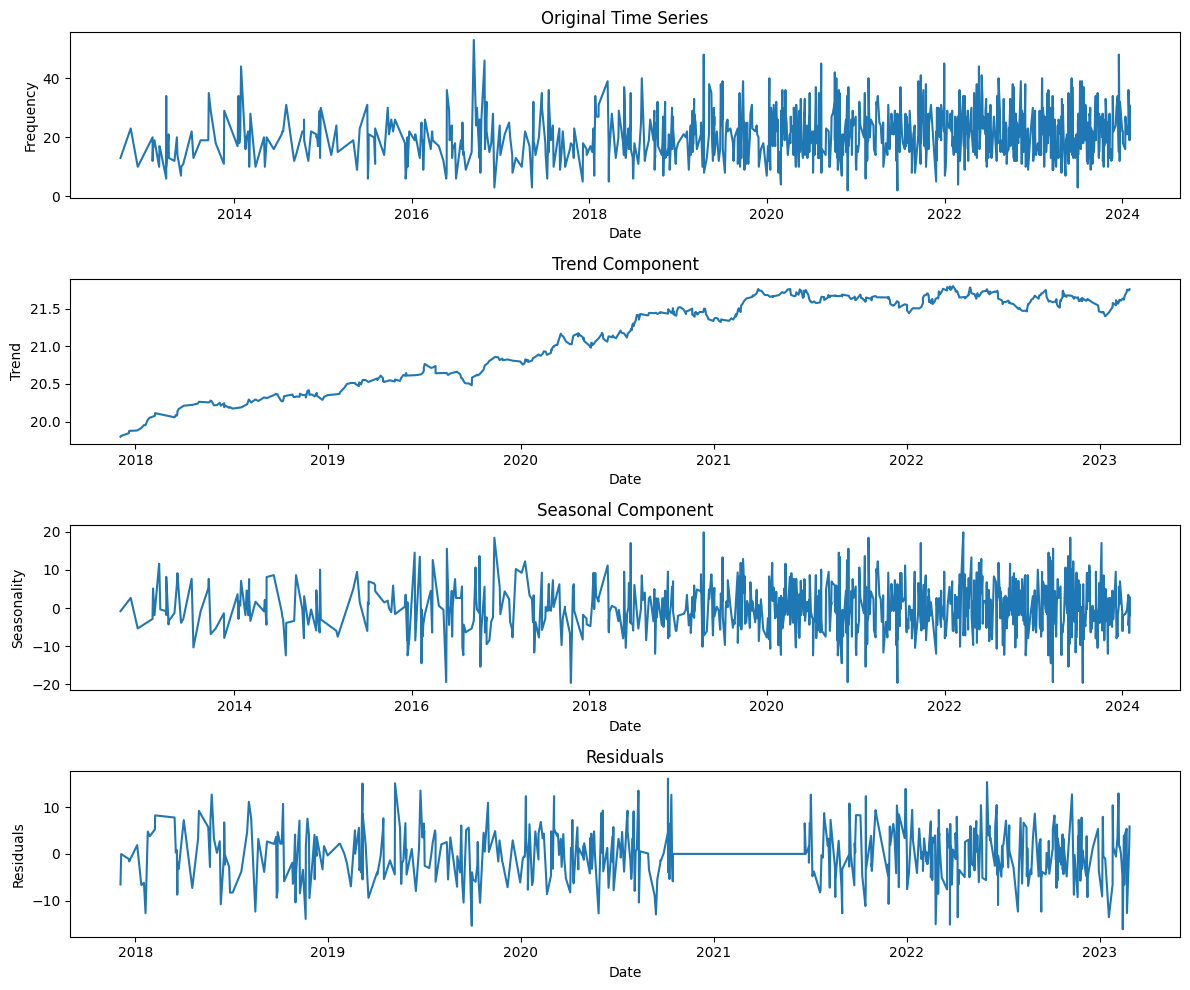

In [63]:
# Seasonal decomposition
decomposition = seasonal_decompose(pos_counts_by_date['IN'], period=365)  # Assuming seasonal period of 365 days (1 year)

# Plot decomposition with improved visualization
plt.figure(figsize=(12, 10))
plt.subplot(4, 1, 1)
plt.plot(pos_counts_by_date['IN'])
plt.title('Original Time Series')
plt.xlabel('Date')
plt.ylabel('Frequency')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend)
plt.title('Trend Component')
plt.xlabel('Date')
plt.ylabel('Trend')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal)
plt.title('Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Seasonality')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid)
plt.title('Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

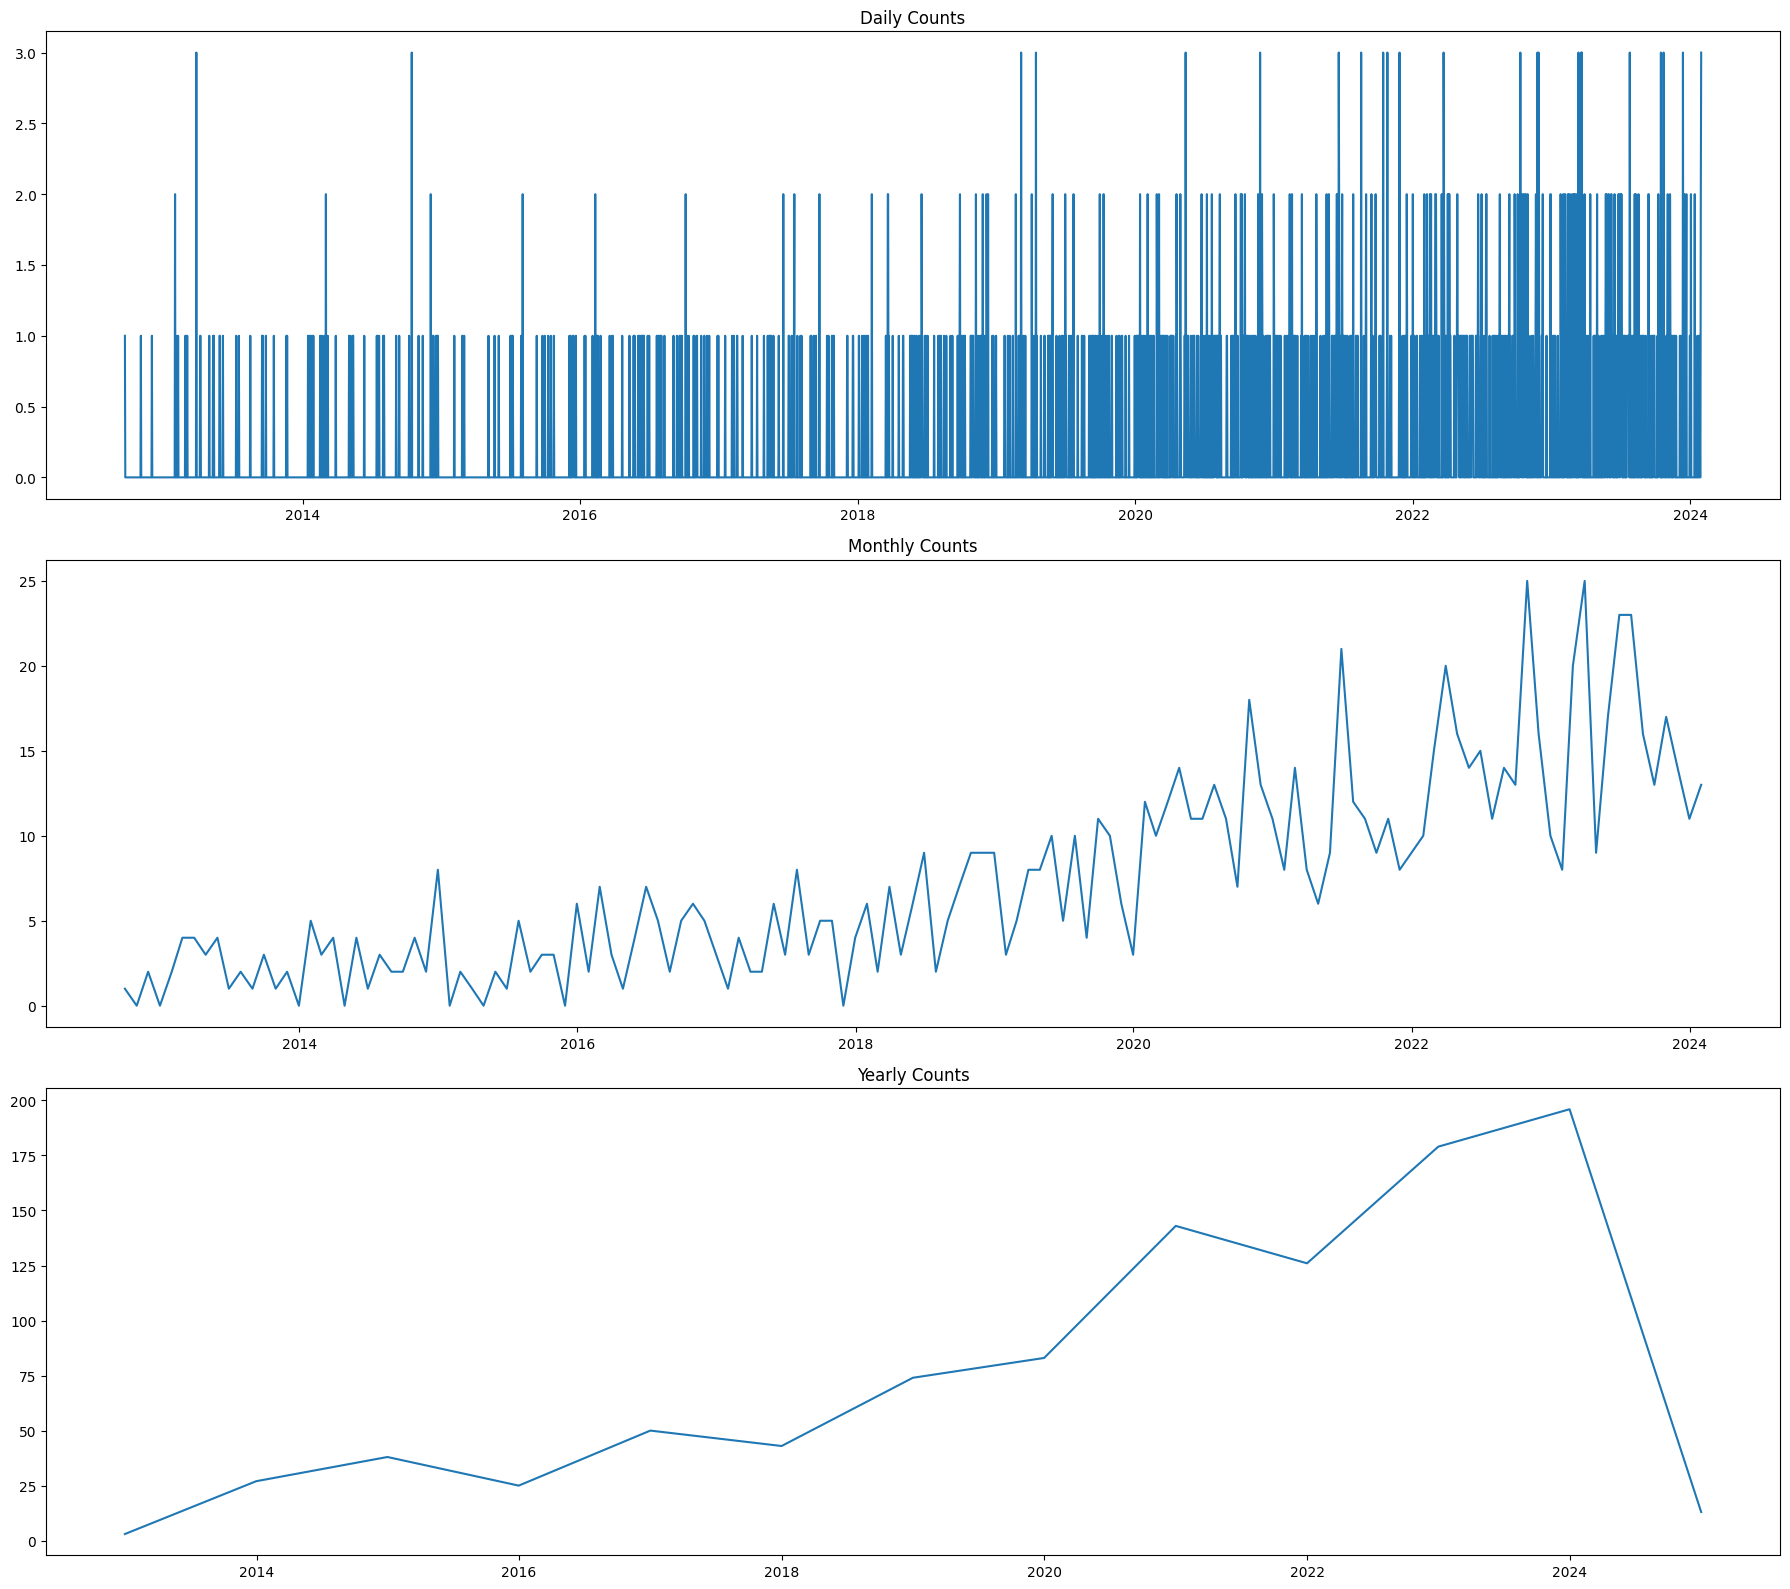

CPU times: total: 703 ms
Wall time: 697 ms


In [59]:
%%time

# Convert index to DateTimeIndex
reindexed_data.index = pd.to_datetime(reindexed_data.index)

# Resample the data to get counts for different time periods
monthly_counts = reindexed_data.resample('M').count()
yearly_counts = reindexed_data.resample('A').count()
daily_counts = reindexed_data.resample('D').count()

# Create subplots
fig, ax = plt.subplots(3, figsize=(18,16))

# Plot daily counts
ax[0].plot(daily_counts)
ax[0].set_title('Daily Counts')
# Plot monthly counts
ax[1].plot(monthly_counts)
ax[1].set_title('Monthly Counts')
# Plot yearly counts
ax[2].plot(yearly_counts)
ax[2].set_title('Yearly Counts')

plt.tight_layout()
plt.show()

In [ ]:
%%time

# Initialize CountVectorizer with specified parameters
small_count_vectorizer = CountVectorizer(stop_words='english', max_features=40000)

# Sample 10,000 titles randomly from the dataset
small_text_sample = reindexed_data.sample(n=1000, random_state=0).values

# Print an example title before vectorization
print('Title/Topic before vectorization: {}'.format(small_text_sample[123]))

# Transform the sampled titles into a document-term matrix using CountVectorizer
small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample)

# Print an example title after vectorization
print('Title/Topic after vectorization: \n{}'.format(small_document_term_matrix[123]))

In [ ]:
# Number of topics for topic modeling
n_topics = 8

In [ ]:
%%time

# Initialize the Latent Semantic Analysis (LSA) model with the specified number of topics
lsa_model = TruncatedSVD(n_components=n_topics)

# Fit the LSA model to the document-term matrix to extract latent topics
lsa_topic_matrix = lsa_model.fit_transform(small_document_term_matrix)

In [ ]:
# Define helper function to extract predicted topic categories
def get_keys(topic_matrix):
    '''
    Returns an integer list of predicted topic categories for a given topic matrix.

    Parameters:
        topic_matrix (numpy.ndarray): Topic matrix obtained from topic modeling.

    Returns:
        list: A list of predicted topic categories.
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

# Define helper function to convert keys into counts
def keys_to_counts(keys):
    '''
    Returns a tuple of topic categories and their accompanying magnitudes for a given list of keys.

    Parameters:
        keys (list): List of predicted topic categories.

    Returns:
        tuple: A tuple containing two lists - categories and their corresponding counts.
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [ ]:
%%time

# Get the predicted topic categories for each document
lsa_keys = get_keys(lsa_topic_matrix)

# Convert keys into counts of each topic category
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [ ]:
# Define helper function to get the top words for each topic
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    Returns a list of strings, where each string contains the n most common 
    words in a predicted category, in order.

    Parameters:
        n (int): Number of top words to retrieve for each topic.
        keys (list): List of predicted topic categories for each document.
        document_term_matrix (numpy.ndarray): Document-term matrix obtained from vectorization.
        count_vectorizer (CountVectorizer): CountVectorizer object used for vectorization.

    Returns:
        list: A list of strings containing the top words for each predicted category.
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [ ]:
%%time

# Get the top words for each topic using the helper function
top_n_words_lsa = get_top_n_words(5, lsa_keys, small_document_term_matrix, small_count_vectorizer)

# Print the top words for each topic
for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

In [ ]:
%%time

# Get the top 5 words for each topic
top_3_words = get_top_n_words(5, lsa_keys, small_document_term_matrix, small_count_vectorizer)

# Create labels for each topic combining the topic number and the top 3 words
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]

# Sort the LSA categories and counts in descending order
sorted_indices = np.argsort(lsa_counts)[::-1]
sorted_categories = [lsa_categories[i] for i in sorted_indices]
sorted_counts = [lsa_counts[i] for i in sorted_indices]

# Create the plot
fig, ax = plt.subplots(figsize=(16,8))

# Plot the LSA topic counts in descending order
ax.bar(range(len(sorted_categories)), sorted_counts)

# Set x-axis ticks and labels
ax.set_xticks(range(len(sorted_categories)))
ax.set_xticklabels([labels[i] for i in sorted_indices], rotation=45)  

# Set y-axis label and title
ax.set_ylabel('Number of headlines')
ax.set_title('LSA topic counts')

# Show the plot
plt.show()

In [ ]:
%%time

# Initialize t-SNE model with specified parameters
tsne_lsa_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                      n_iter=2000, verbose=1, random_state=0, angle=0.75)

# Fit the t-SNE model to the LSA topic matrix
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_topic_matrix)

In [ ]:
# Define a helper function to calculate the mean topic vectors
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''
    Calculate and return a list of centroid vectors from each predicted topic category.
    
    Parameters:
        keys (list): List of predicted topic categories for each document.
        two_dim_vectors (array-like): 2D array of two-dimensional vectors.
        
    Returns:
        list: List of centroid vectors from each predicted topic category.
    '''
    mean_topic_vectors = []
    # Loop through each topic category
    for t in range(n_topics):
        articles_in_that_topic = []
        # Gather all vectors associated with the current topic category
        for i in range(len(keys)):
            if keys[i] == t:
                articles_in_that_topic.append(two_dim_vectors[i])
        
        # Convert gathered vectors into a numpy array
        articles_in_that_topic = np.vstack(articles_in_that_topic)
        # Calculate the mean vector for the current topic category
        mean_article_in_that_topic = np.mean(articles_in_that_topic, axis=0)
        # Append the mean vector to the list of mean topic vectors
        mean_topic_vectors.append(mean_article_in_that_topic)
    
    return mean_topic_vectors

In [ ]:
# Define a colormap for visualizing different topics
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])

# Truncate the colormap to match the number of topics
colormap = colormap[:n_topics]

In [ ]:
%%time

# Get the top 5 words for each LSA topic
top_3_words_lsa = get_top_n_words(5, lsa_keys, small_document_term_matrix, small_count_vectorizer)

# Calculate mean topic vectors for t-SNE visualization
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors)

# Create a Bokeh plot for t-SNE clustering of LSA topics
plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), width=700, height=700)

# Scatter plot the t-SNE vectors with colors corresponding to LSA topic keys
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])

# Add labels for each topic at its mean coordinates
for t in range(n_topics):
    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
                  text=top_3_words_lsa[t], text_color=colormap[t])
    plot.add_layout(label)

# Output the plot to the notebook
output_notebook()
show(plot)

In [ ]:
%%time

# Initialize Latent Dirichlet Allocation (LDA) model
lda_model = LatentDirichletAllocation(n_components=n_topics, learning_method='online', random_state=0, verbose=0)

# Fit LDA model to the document-term matrix
lda_topic_matrix = lda_model.fit_transform(small_document_term_matrix)

In [ ]:
%%time

# Get the predicted topic categories for each document from the LDA topic matrix
lda_keys = get_keys(lda_topic_matrix)

# Convert keys into counts of each topic category
lda_categories, lda_counts = keys_to_counts(lda_keys)

In [ ]:
%%time

# Get the top words for each topic using the LDA model
top_n_words_lda = get_top_n_words(5, lda_keys, small_document_term_matrix, small_count_vectorizer)

# Print the top words for each topic
for i in range(len(top_n_words_lda)):
    print("Topic {}: ".format(i+1), top_n_words_lda[i])

In [ ]:
%%time

# Sort the LDA categories and counts in descending order
sorted_indices = np.argsort(lda_counts)[::-1]
sorted_categories = [lda_categories[i] for i in sorted_indices]
sorted_counts = [lda_counts[i] for i in sorted_indices]

# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the LDA topic counts in descending order
ax.bar(range(len(sorted_categories)), sorted_counts)

# Set x-axis ticks and labels
ax.set_xticks(range(len(sorted_categories)))
ax.set_xticklabels([labels[i] for i in sorted_indices], rotation=45)

# Set y-axis label and title
ax.set_ylabel('Number of headlines')
ax.set_title('LDA topic counts')

# Show the plot
plt.show()

In [ ]:
%%time

# Combine LSA and LDA counts and categories
combined_counts = np.array(lsa_counts) + np.array(lda_counts)
combined_categories = lsa_categories + lda_categories

# Sort the combined categories and counts in descending order
sorted_indices = np.argsort(combined_counts)[::-1]
sorted_categories = [combined_categories[i] for i in sorted_indices]
sorted_counts = [combined_counts[i] for i in sorted_indices]
sorted_lsa_counts = [lsa_counts[i] for i in sorted_indices]
sorted_lda_counts = [lda_counts[i] for i in sorted_indices]

# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the combined LSA and LDA topic counts in descending order as a stacked bar chart
ax.bar(range(len(sorted_categories)), sorted_lsa_counts, label='LSA')
ax.bar(range(len(sorted_categories)), sorted_lda_counts, bottom=sorted_lsa_counts, label='LDA')

# Set x-axis ticks and labels
ax.set_xticks(range(len(sorted_categories)))
ax.set_xticklabels([labels[i] for i in sorted_indices], rotation=45)

# Set y-axis label and title
ax.set_ylabel('Number of headlines')
ax.set_title('Combined LSA and LDA topic counts')

# Add legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
%%time

# Initialize t-SNE model with specified parameters
tsne_lda_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                      n_iter=2000, verbose=1, random_state=0, angle=0.75)

# Fit the t-SNE model to the LDA topic matrix to obtain 2D vectors
tsne_lda_vectors = tsne_lda_model.fit_transform(lda_topic_matrix)

In [ ]:
%%time

# Get the top 3 words for each topic using the LDA model
top_3_words_lda = get_top_n_words(5, lda_keys, small_document_term_matrix, small_count_vectorizer)

# Calculate the mean topic vectors for the LDA model
lda_mean_topic_vectors = get_mean_topic_vectors(lda_keys, tsne_lda_vectors)

# Create a Bokeh plot for t-SNE clustering of LDA topics
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), width=700, height=700)

# Scatter plot of t-SNE vectors colored by LDA topic keys
plot.scatter(x=tsne_lda_vectors[:,0], y=tsne_lda_vectors[:,1], color=colormap[lda_keys])

# Add labels for each topic at the mean position of the topic vectors
for t in range(n_topics):
    label = Label(x=lda_mean_topic_vectors[t][0], y=lda_mean_topic_vectors[t][1], 
                  text=top_3_words_lda[t], text_color=colormap[t])
    plot.add_layout(label)

# Show the plot
show(plot)

In [ ]:
%%time

# Concatenating all the DataFrames
df = pd.concat([
    df1a, df1b, df2, df3, df4, df5, df6a, df6b, df7, df8, df9, df10,
    df11, df12, df13, df14, df15, df16, df17, df18, df19, df20,
    df21, df22a, df22b, df22c, df23, df24, df25, df26, df27, df28, df29, df30,
    df31, df32, df33, df34, df35, df36, df37, df38
]).reset_index(drop=True)

sample_df = df.sample(n=10000, random_state=42)  
df = sample_df


# Convert 'Published (date)' column to datetime format
df['Published'] = pd.to_datetime(df['Published'])

# Extract year and month from the 'Published' column
df['YearMonth'] = df['Published'].dt.to_period('M')

# Initialize CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english')

# Vectorize the text data
document_term_matrix = count_vectorizer.fit_transform(df['Title'])

# Perform topic modeling using LSA
n_topics = 8
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)
lsa_keys = np.argmax(lsa_topic_matrix, axis=1)

# Perform topic modeling using LDA
lda_model = LatentDirichletAllocation(n_components=n_topics, learning_method='online', random_state=0)
lda_topic_matrix = lda_model.fit_transform(document_term_matrix)
lda_keys = np.argmax(lda_topic_matrix, axis=1)

# Aggregate LSA and LDA topic counts based on publication date
lsa_topic_counts = df.groupby('YearMonth').apply(lambda x: np.bincount(lsa_keys[x.index])).apply(pd.Series).sum(axis=0)
lda_topic_counts = df.groupby('YearMonth').apply(lambda x: np.bincount(lda_keys[x.index])).apply(pd.Series).sum(axis=0)

# Plot the time series of topic growth
plt.figure(figsize=(14, 7))
lsa_topic_counts.plot(label='LSA', color='b')
lda_topic_counts.plot(label='LDA', color='r')
plt.xlabel('Year-Month')
plt.ylabel('Number of Headlines')
plt.title('Topic Growth Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()